# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [64]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [57]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

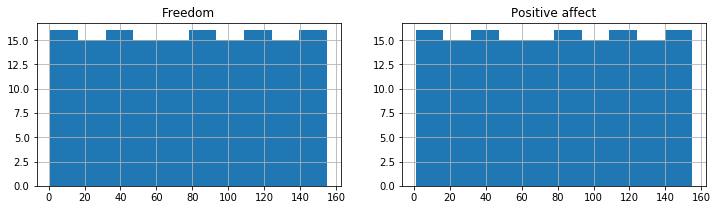

In [11]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
htm1 = df['Freedom'].hist()
htm1.set_title('Freedom')
plt.subplot(1, 2, 2)
htm2 = df['Positive affect'].hist()
htm2.set_title('Positive affect')
plt.show()

Параметры 'Freedom' и 'Positive affect' имеют равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [65]:
df['Freedom'].isnull().sum()

1

In [58]:
df[pd.isnull(df['Freedom'])]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


Катар в данной выборки является выбросом  
По Катару данные практически отсутсвуют, поэтому можно эту страуну удалить из выборки

In [67]:
df.dropna(subset=['Freedom'], inplace=True)

In [72]:
print('Математическое ожидание: ', statistics.mean(df['Freedom']))
print('Стандартное отклонение: ', statistics.pstdev(df['Freedom']))
print('Дисперсия: ', statistics.pvariance(df['Freedom']))
print('Медиана: ', statistics.median(df['Freedom']))
try:
    print('Значение моды: ', statistics.mode(df['Freedom']))
except:
    print('Не удалось найти моду')
print('Значение минимум: ', min(df['Freedom']))
print('Значение максимум: ', max(df['Freedom']))
print('Размах: ', max(df['Freedom'])-min(df['Freedom']))


Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Медиана:  78.0
Не удалось найти моду
Значение минимум:  1.0
Значение максимум:  155.0
Размах:  154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601656


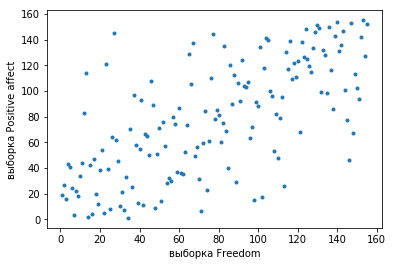

In [76]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [80]:
from sklearn import preprocessing
duration_1 = df['Freedom'] - statistics.mean(df['Freedom'])
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
duration_2[0:5]

array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377]])

Построить матрицу корреляций для всех колонок таблицы

In [81]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.542711,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.812084,0.816052
SD of Ladder,0.542711,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.637844,0.613389
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.812084,0.637844,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.849084
Healthy life\nexpectancy,0.816052,0.613389,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.849084,1.000000


Загрузить следующую таблицу: 

In [82]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Это нормальное распределение


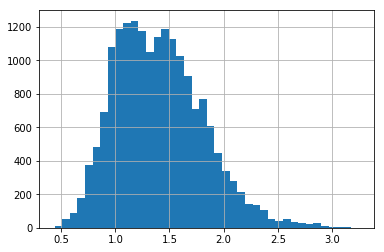

In [89]:
df['AveragePrice'].hist(bins=40)
print('Это нормальное распределение')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

-0.20831704848788477

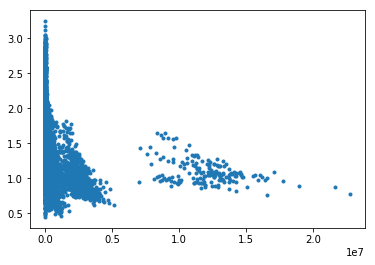

In [106]:
plt.scatter(df['4046'], df['AveragePrice'], marker='.')
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
corr

Корреляция имеет место быть. Особенно это заметно, если разделить выборку на 2 независимые выборки

коэффициент Пирсона для "4046"<6000000 = -0.3418591854317798
коэффициент Пирсона для "4046">6000000 = -0.4364029900371939


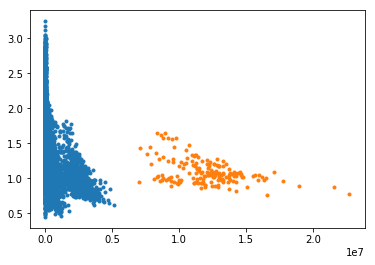

In [110]:
plt.scatter(df[df['4046']<6000000]['4046'], df[df['4046']<6000000]['AveragePrice'], marker='.')
corr, p_value = pearsonr(df[df['4046']<6000000]['4046'], df[df['4046']<6000000]['AveragePrice'])
print(f'коэффициент Пирсона для "4046"<6000000 = {corr}')
plt.scatter(df[df['4046']>=6000000]['4046'], df[df['4046']>=6000000]['AveragePrice'], marker='.')
corr, p_value = pearsonr(df[df['4046']>=6000000]['4046'], df[df['4046']>=6000000]['AveragePrice'])
print(f'коэффициент Пирсона для "4046">6000000 = {corr}')
